# Self Study 5

In [100]:
data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
         ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
         ("data science", 60, 70), ("analytics", 90, 3),
         ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
         ("actionable insights", 40, 30), ("think out of the box", 45, 10),
         ("self-starter", 30, 50), ("customer focus", 65, 15),
         ("thought leadership", 35, 35)]

In [101]:
data

[('big data', 100, 15),
 ('Hadoop', 95, 25),
 ('Python', 75, 50),
 ('R', 50, 40),
 ('machine learning', 80, 20),
 ('statistics', 20, 60),
 ('data science', 60, 70),
 ('analytics', 90, 3),
 ('team player', 85, 85),
 ('dynamic', 2, 90),
 ('synergies', 70, 0),
 ('actionable insights', 40, 30),
 ('think out of the box', 45, 10),
 ('self-starter', 30, 50),
 ('customer focus', 65, 15),
 ('thought leadership', 35, 35)]

In [102]:
def text_size(total):
  """equals 8 if total is 0, 28 if total is 200"""
  return 8 + total / 200 * 20

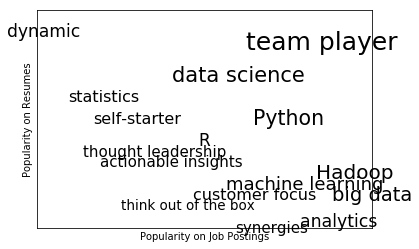

In [103]:
import matplotlib.pyplot as plt
for word, job_popularity, resume_popularity in data:
    plt.text(job_popularity, resume_popularity, word, ha='center', va='center', size=text_size(job_popularity + resume_popularity))
plt.xlabel("Popularity on Job Postings")
plt.ylabel("Popularity on Resumes")
plt.axis([0, 100, 0, 100])
plt.xticks([])
plt.yticks([])
plt.show()

In [153]:
from bs4 import BeautifulSoup
import requests
import re
def fix_unicode(text):
     return text.replace(u"\u2019", "'")
def get_document():
    url = "http://radar.oreilly.com/2010/06/what-is-data-science.html"
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html5lib')

    content = soup.find("div", "article-body")         # find article-body div
    regex = r"[\w']+|[\.]"                             # matches a word or a period

    document = []

 
    for paragraph in content("p"):
        words = re.findall(regex, fix_unicode(paragraph.text))
        document.extend(words)

    return document
document=get_document()
document

["We've",
 'all',
 'heard',
 'it',
 'according',
 'to',
 'Hal',
 'Varian',
 'statistics',
 'is',
 'the',
 'next',
 'sexy',
 'job',
 '.',
 'Five',
 'years',
 'ago',
 'in',
 'What',
 'is',
 'Web',
 '2',
 '.',
 '0',
 'Tim',
 "O'Reilly",
 'said',
 'that',
 'data',
 'is',
 'the',
 'next',
 'Intel',
 'Inside',
 '.',
 'But',
 'what',
 'does',
 'that',
 'statement',
 'mean',
 'Why',
 'do',
 'we',
 'suddenly',
 'care',
 'about',
 'statistics',
 'and',
 'about',
 'data',
 'In',
 'this',
 'post',
 'I',
 'examine',
 'the',
 'many',
 'sides',
 'of',
 'data',
 'science',
 'the',
 'technologies',
 'the',
 'companies',
 'and',
 'the',
 'unique',
 'skill',
 'sets',
 '.',
 'The',
 'web',
 'is',
 'full',
 'of',
 'data',
 'driven',
 'apps',
 '.',
 'Almost',
 'any',
 'e',
 'commerce',
 'application',
 'is',
 'a',
 'data',
 'driven',
 'application',
 '.',
 "There's",
 'a',
 'database',
 'behind',
 'a',
 'web',
 'front',
 'end',
 'and',
 'middleware',
 'that',
 'talks',
 'to',
 'a',
 'number',
 'of',
 'other

In [86]:
import collections
bigrams = zip(document, document[1:])
transitions = collections.defaultdict(list)
for prev, current in bigrams:
    transitions[prev].append(current)

In [87]:
import random
def generate_using_bigrams():
    current = "." # this means the next word will start a sentence
    result = []
    while True:
        next_word_candidates = transitions[current] # bigrams (current, _)
        current = random.choice(next_word_candidates) # choose one at random
        result.append(current) # append it to results
        if current == ".": 
            return " ".join(result) # if "." we're done
generate_using_bigrams()

'We now expect web is also be widely applicable to looking at a number of them .'

In [93]:
trigrams = zip(document, document[1:], document[2:])
trigram_transitions = collections.defaultdict(list)
starts = []
for prev, current, next in trigrams:
    if prev == ".": # if the previous "word" was a period
           starts.append(current) # then this is a start word
    trigram_transitions[(prev, current)].append(next)

In [94]:
def generate_using_trigrams():
    current = random.choice(starts) # choose a random starting word
    prev = "." # and precede it with a '.'
    result = [current]
    while True:
        next_word_candidates = trigram_transitions[(prev, current)]
        next_word = random.choice(next_word_candidates)
        prev, current = current, next_word
        result.append(current)
        if current == ".":
            return " ".join(result)
generate_using_trigrams()

"Data expands to fill the space you have a CD you've taken advantage of this data would be nice if there was a valuable data product ."

In [105]:
grammar = {
  "_S" : ["_NP _VP"],
  "_NP" : ["_N",
  "_A _NP _P _A _N"],
  "_VP" : ["_V",
  "_V _NP"],
  "_N" : ["data science", "Python", "regression"],
  "_A" : ["big", "linear", "logistic"],
  "_P" : ["about", "near"],
  "_V" : ["learns", "trains", "tests", "is"]
}


In [106]:
def is_terminal(token):
    return token[0] != "_"

In [107]:
def expand(grammar, tokens):
    for i, token in enumerate(tokens):
    # skip over terminals
        if is_terminal(token): continue
        # if we get here, we found a non-terminal token
        # so we need to choose a replacement at random
        replacement = random.choice(grammar[token])
        if is_terminal(replacement):
            tokens[i] = replacement
        else:
            tokens = tokens[:i] + replacement.split() + tokens[(i+1):]
        # now call expand on the new list of tokens
        return expand(grammar, tokens)
        # if we get here we had all terminals and are done
    return tokens


In [108]:
def generate_sentence(grammar):
    return expand(grammar, ["_S"])

In [109]:
generate_sentence(grammar)

['linear',
 'logistic',
 'logistic',
 'Python',
 'near',
 'logistic',
 'data science',
 'near',
 'logistic',
 'Python',
 'about',
 'logistic',
 'regression',
 'learns',
 'linear',
 'logistic',
 'logistic',
 'linear',
 'data science',
 'near',
 'logistic',
 'data science',
 'near',
 'linear',
 'regression',
 'near',
 'linear',
 'Python',
 'near',
 'logistic',
 'regression']

In [154]:
def roll_a_die():
    return random.choice([1,2,3,4,5,6])

def direct_sample():
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1 + d2

def random_y_given_x(x):
    """equally likely to be x + 1, x + 2, ... , x + 6"""
    return x + roll_a_die()

In [155]:
direct_sample()

(6, 7)

In [156]:
def random_x_given_y(y):
    if y <= 7:
        # if the total is 7 or less, the first die is equally likely to be
        # 1, 2, ..., (total - 1)
        return random.randrange(1, y)
    else:
        # if the total is 7 or more, the first die is equally likely to be
        # (total - 6), (total - 5), ..., 6
        return random.randrange(y - 6, 7)

In [157]:
def gibbs_sample(num_iters=100):
    x, y = 1, 2 # doesn't really matter
    for _ in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)
    return x, y

In [158]:
import collections
def compare_distributions(num_samples=1000):
    counts = collections.defaultdict(lambda: [0, 0])
    for _ in range(num_samples):
        counts[gibbs_sample()][0] += 1
        counts[direct_sample()][1] += 1
    return counts

In [159]:
compare_distributions()

defaultdict(<function __main__.compare_distributions.<locals>.<lambda>()>,
            {(4, 8): [34, 25],
             (6, 10): [34, 29],
             (2, 3): [37, 27],
             (4, 5): [31, 26],
             (5, 10): [30, 21],
             (1, 7): [30, 27],
             (1, 4): [26, 33],
             (1, 5): [33, 36],
             (1, 6): [28, 23],
             (5, 9): [23, 26],
             (2, 7): [15, 28],
             (1, 3): [27, 26],
             (4, 7): [39, 36],
             (4, 6): [23, 33],
             (6, 7): [24, 24],
             (2, 6): [37, 37],
             (2, 8): [38, 26],
             (3, 7): [23, 23],
             (3, 5): [29, 32],
             (1, 2): [27, 32],
             (3, 4): [30, 31],
             (5, 11): [21, 27],
             (6, 9): [36, 32],
             (3, 6): [21, 14],
             (2, 5): [20, 35],
             (6, 11): [22, 26],
             (3, 8): [33, 33],
             (3, 9): [28, 24],
             (5, 6): [28, 35],
             (4, 10): 

In [115]:
def sample_from(weights):
    """returns i with probability weights[i] / sum(weights)"""
    total = sum(weights)
    rnd = total * random.random() # uniform between 0 and total
    for i, w in enumerate(weights):
        rnd -= w # return the smallest i such that
        if rnd <= 0: return i # weights[0] + ... + weights[i] >= rnd

In [116]:
documents = [
  ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
  ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
  ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
  ["R", "Python", "statistics", "regression", "probability"],
  ["machine learning", "regression", "decision trees", "libsvm"],
  ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
  ["statistics", "probability", "mathematics", "theory"],
  ["machine learning", "scikit-learn", "Mahout", "neural networks"],
  ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
  ["Hadoop", "Java", "MapReduce", "Big Data"],
  ["statistics", "R", "statsmodels"],
  ["C++", "deep learning", "artificial intelligence", "probability"],
  ["pandas", "R", "Python"],
  ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
  ["libsvm", "regression", "support vector machines"]
]

In [117]:
import collections
document_topic_counts = [collections.Counter() for i in documents]

In [118]:
document_topic_counts

[Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter()]

In [119]:
K = 4
topic_word_counts = [collections.Counter() for _ in range(K)]

In [120]:
topic_word_counts

[Counter(), Counter(), Counter(), Counter()]

In [121]:
topic_counts = [0 for _ in range(K)]

In [122]:
topic_counts

[0, 0, 0, 0]

In [123]:
document_lengths = list(map(len, documents))

In [124]:
document_lengths

[7, 5, 6, 5, 4, 6, 4, 4, 4, 4, 3, 4, 3, 5, 3]

In [125]:
distinct_words = set(word for document in documents for word in document)
W = len(distinct_words)

In [138]:
distinct_words

{'Big Data',
 'C++',
 'Cassandra',
 'HBase',
 'Hadoop',
 'Haskell',
 'Java',
 'Mahout',
 'MapReduce',
 'MongoDB',
 'MySQL',
 'NoSQL',
 'Postgres',
 'Python',
 'R',
 'Spark',
 'Storm',
 'artificial intelligence',
 'databases',
 'decision trees',
 'deep learning',
 'libsvm',
 'machine learning',
 'mathematics',
 'neural networks',
 'numpy',
 'pandas',
 'probability',
 'programming languages',
 'regression',
 'scikit-learn',
 'scipy',
 'statistics',
 'statsmodels',
 'support vector machines',
 'theory'}

In [126]:
W

36

In [136]:
D = len(documents)

In [128]:
D

15

In [129]:
document_topic_counts[3][1]

0

In [130]:
topic_word_counts[2]["nlp"]

0

In [139]:
def p_topic_given_document(topic, d, alpha=0.1):
    return ((document_topic_counts[d][topic] + alpha) / (document_lengths[d] + K * alpha))

In [140]:
def p_word_given_topic(word, topic, beta=0.1):
    return ((topic_word_counts[topic][word] + beta) / (topic_counts[topic] + W * beta))

In [141]:
def topic_weight(d, word, k):
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

In [142]:
def choose_new_topic(d, word):
    return sample_from([topic_weight(d, word, k) for k in range(K)])

In [143]:
random.seed(0)
document_topics = [[random.randrange(K) for word in document] for document in documents]

In [144]:
for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

In [145]:
for iter in range(1000):
    for d in range(D):
        for i, (word, topic) in enumerate(zip(documents[d], document_topics[d])):
            # remove this word / topic from the counts
            # so that it doesn't influence the weights
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1
            # choose a new topic based on the weights
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic
            # and now add it back to the counts
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] += 1

In [146]:
for k, word_counts in enumerate(topic_word_counts):
    for word, count in word_counts.most_common():
        if count > 0: print(k, word, count)

0 scikit-learn 4
0 pandas 4
0 HBase 2
0 R 2
0 Java 2
0 C++ 2
0 Haskell 2
0 artificial intelligence 2
0 Big Data 2
0 statsmodels 2
0 regression 1
0 statistics 1
0 Hadoop 1
0 libsvm 1
0 scipy 1
0 numpy 1
0 mathematics 1
0 deep learning 1
1 neural networks 4
1 deep learning 3
1 MongoDB 3
1 HBase 2
1 decision trees 2
1 theory 2
1 Mahout 2
1 databases 2
1 Postgres 2
1 MySQL 2
1 Cassandra 1
1 Python 1
1 numpy 1
1 Big Data 1
1 statistics 1
2 Python 5
2 regression 5
2 R 5
2 Java 4
2 Cassandra 3
2 probability 3
2 machine learning 3
2 statistics 3
2 Postgres 2
2 statsmodels 2
2 C++ 2
2 artificial intelligence 2
2 HBase 2
2 MongoDB 1
2 scipy 1
2 mathematics 1
2 Storm 1
2 programming languages 1
3 Hadoop 3
3 Big Data 3
3 libsvm 3
3 probability 3
3 Spark 2
3 NoSQL 2
3 Python 2
3 MapReduce 2
3 support vector machines 2
3 Storm 1
3 statistics 1
3 machine learning 1
3 programming languages 1
3 R 1


In [147]:
topic_names = ["Big Data and programming languages",
  "Python and statistics",
  "databases",
  "machine learning"]

In [150]:
for document, topic_counts in zip(documents, document_topic_counts):
    print(document)
    for topic, count in topic_counts.most_common():
        if count > 0:
            print(topic_names[topic], count,)
    print()

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
machine learning 7
databases 5
Big Data and programming languages 2

['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
databases 5
Python and statistics 3
machine learning 2

['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
Big Data and programming languages 6
databases 4
Python and statistics 2

['R', 'Python', 'statistics', 'regression', 'probability']
databases 6
Big Data and programming languages 3
machine learning 1

['machine learning', 'regression', 'decision trees', 'libsvm']
machine learning 3
databases 3
Python and statistics 2

['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
Big Data and programming languages 5
databases 4
machine learning 3

['statistics', 'probability', 'mathematics', 'theory']
Python and statistics 3
Big Data and programming languages 2
machine learning 2
databases 1

['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
Python a

In [151]:
for line in open("myfile.txt"):
    for word in line.split():
        if word.endswith('ing'):
            print(word)

programming
using
programming
stepping
programming
including
operating


In [3]:
1 + 5 * 2 - 3

8

In [4]:
1 +

SyntaxError: invalid syntax (<ipython-input-4-953e01372b97>, line 1)

In [5]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [6]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [7]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [8]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

In [9]:
 text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [11]:
 text1.concordance("whales")

Displaying 25 of 268 matches:
ing up whatever random allusions to whales he could anyways find in any book w
 EXTRACTS . " And God created great whales ." -- GENESIS . " Leviathan maketh 
t fishes that are : among which the Whales and Whirlpooles called Balaene , ta
a , when about sunrise a great many Whales and other monsters of the sea , app
lso with a view of catching horse - whales , which had bones of very great val
ght some to the king . ... The best whales were catched in his own country , o
 -- THE FAERIE QUEEN . " Immense as whales , the motion of whose vast bodies c
out a sea ." -- IBID . " The mighty whales which swim in a sea of water , and 
CHAS . " In their way they saw many whales sporting in the ocean , and in want
" Here they saw such huge troops of whales , that they were forced to proceed 
 . D . 1671 HARRIS COLL . " Several whales have come in upon this coast ( Fife
S . PHIL . TRANS . A . D . 1668 . " Whales in the sea God ' s voice obey ." --
 . " We saw also abund

In [12]:
 text2.concordance("monstrous")

Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." He immediately went
your sister is to marry him . I am monstrous glad of it , for then I shall have
ou may tell your sister . She is a monstrous lucky girl to get him , upon my ho
k how you will like them . Lucy is monstrous pretty , and so good humoured and 
 Jennings , " I am sure I shall be monstrous glad of Miss Marianne ' s company 
 usual noisy cheerfulness , " I am monstrous glad to see you -- sorry I could n
t however , as it turns out , I am monstrous glad there was never any thing in 
so scornfully ! for they say he is monstrous fond of her , as well he may . I s
possible that she should ." " I am monstrous glad of it . Good gracious ! I hav
thing of the kind . So then he was monstrous happy , and talked on some time ab
e very genteel people . He makes a monstrous deal of money , and they keep thei


In [13]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [14]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [15]:
text2.common_contexts(["monstrous", "very"])

a_pretty am_glad a_lucky is_pretty be_glad


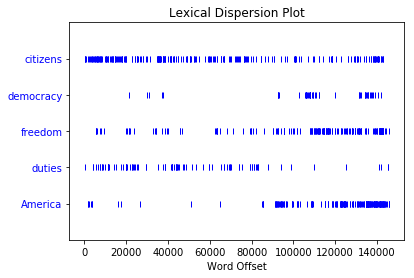

In [17]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [22]:
text3.generate()

TypeError: generate() missing 1 required positional argument: 'words'

In [23]:
len(text3)

44764

In [24]:
sorted(set(text3))

['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech',
 'Abr',
 'Abrah',
 'Abraham',
 'Abram',
 'Accad',
 'Achbor',
 'Adah',
 'Adam',
 'Adbeel',
 'Admah',
 'Adullamite',
 'After',
 'Aholibamah',
 'Ahuzzath',
 'Ajah',
 'Akan',
 'All',
 'Allonbachuth',
 'Almighty',
 'Almodad',
 'Also',
 'Alvah',
 'Alvan',
 'Am',
 'Amal',
 'Amalek',
 'Amalekites',
 'Ammon',
 'Amorite',
 'Amorites',
 'Amraphel',
 'An',
 'Anah',
 'Anamim',
 'And',
 'Aner',
 'Angel',
 'Appoint',
 'Aram',
 'Aran',
 'Ararat',
 'Arbah',
 'Ard',
 'Are',
 'Areli',
 'Arioch',
 'Arise',
 'Arkite',
 'Arodi',
 'Arphaxad',
 'Art',
 'Arvadite',
 'As',
 'Asenath',
 'Ashbel',
 'Asher',
 'Ashkenaz',
 'Ashteroth',
 'Ask',
 'Asshur',
 'Asshurim',
 'Assyr',
 'Assyria',
 'At',
 'Atad',
 'Avith',
 'Baalhanan',
 'Babel',
 'Bashemath',
 'Be',
 'Because',
 'Becher',
 'Bedad',
 'Beeri',
 'Beerlahairoi',
 'Beersheba',
 'Behold',
 'Bela',
 'Belah

In [25]:
len(set(text3))

2789

In [26]:
len(set(text3)) / len(text3)

0.06230453042623537

In [27]:
text3.count("smote")

5

In [28]:
100 * text4.count('a') / len(text4)

1.4643016433938312

In [29]:
def lexical_diversity(text):
    return len(set(text)) / len(text) 

In [30]:
def percentage(count, total):
    return 100 * count / total

In [31]:
lexical_diversity(text3)

0.06230453042623537

In [32]:
lexical_diversity(text5)

0.13477005109975562

In [33]:
percentage(4, 5)

80.0

In [34]:
percentage(text4.count('a'), len(text4))

1.4643016433938312

In [35]:
sent1 = ['Call', 'me', 'Ishmael', '.']

In [36]:
sent1

['Call', 'me', 'Ishmael', '.']

In [37]:
len(sent1)

4

In [38]:
lexical_diversity(sent1)

1.0

In [39]:
sent2

['The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in',
 'Sussex',
 '.']

In [40]:
sent3

['In',
 'the',
 'beginning',
 'God',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth',
 '.']

In [41]:
 ['Monty', 'Python'] + ['and', 'the', 'Holy', 'Grail'] 

['Monty', 'Python', 'and', 'the', 'Holy', 'Grail']

In [42]:
sent4 + sent1

['Fellow',
 '-',
 'Citizens',
 'of',
 'the',
 'Senate',
 'and',
 'of',
 'the',
 'House',
 'of',
 'Representatives',
 ':',
 'Call',
 'me',
 'Ishmael',
 '.']

In [43]:
sent1.append("Some")

In [44]:
sent1

['Call', 'me', 'Ishmael', '.', 'Some']

In [45]:
text4[173]

'awaken'

In [46]:
text4.index('awaken')

173

In [47]:
text5[16715:16735]

['U86',
 'thats',
 'why',
 'something',
 'like',
 'gamefly',
 'is',
 'so',
 'good',
 'because',
 'you',
 'can',
 'actually',
 'play',
 'a',
 'full',
 'game',
 'without',
 'buying',
 'it']

In [48]:
text6[1600:1625]

['We',
 "'",
 're',
 'an',
 'anarcho',
 '-',
 'syndicalist',
 'commune',
 '.',
 'We',
 'take',
 'it',
 'in',
 'turns',
 'to',
 'act',
 'as',
 'a',
 'sort',
 'of',
 'executive',
 'officer',
 'for',
 'the',
 'week']

In [49]:
sent = ['word1', 'word2', 'word3', 'word4', 'word5', 'word6', 'word7', 'word8', 'word9', 'word10']

In [50]:
sent[0]

'word1'

In [51]:
sent[10]

IndexError: list index out of range

In [52]:
sent[8]

'word9'

In [53]:
sent[5:8]

['word6', 'word7', 'word8']

In [54]:
sent[5]

'word6'

In [55]:
sent[6]

'word7'

In [56]:
sent[7]

'word8'

In [57]:
text2[141525:] 

['among',
 'the',
 'merits',
 'and',
 'the',
 'happiness',
 'of',
 'Elinor',
 'and',
 'Marianne',
 ',',
 'let',
 'it',
 'not',
 'be',
 'ranked',
 'as',
 'the',
 'least',
 'considerable',
 ',',
 'that',
 'though',
 'sisters',
 ',',
 'and',
 'living',
 'almost',
 'within',
 'sight',
 'of',
 'each',
 'other',
 ',',
 'they',
 'could',
 'live',
 'without',
 'disagreement',
 'between',
 'themselves',
 ',',
 'or',
 'producing',
 'coolness',
 'between',
 'their',
 'husbands',
 '.',
 'THE',
 'END']

In [58]:
sent[0] = 'First'

In [59]:
sent[9] = 'Last'

In [60]:
len(sent)

10

In [61]:
sent[1:9] = ['Second', 'Third'] 

In [62]:
sent

['First', 'Second', 'Third', 'Last']

In [63]:
 sent[9]

IndexError: list index out of range

In [64]:
sent1 = ['Call', 'me', 'Ishmael', '.']

In [65]:
my_sent = ['Bravely', 'bold', 'Sir', 'Robin', ',', 'rode', 'forth', 'from', 'Camelot', '.']

In [66]:
noun_phrase = my_sent[1:4]

In [67]:
noun_phrase

['bold', 'Sir', 'Robin']

In [68]:
 wOrDs = sorted(noun_phrase)

In [69]:
 wOrDs

['Robin', 'Sir', 'bold']

In [70]:
not = 'Camelot' 

SyntaxError: invalid syntax (<ipython-input-70-4961bbbbef94>, line 1)

In [72]:
vocab = set(text1)
vocab_size = len(vocab)
vocab_size

19317

In [73]:
name = 'Monty'

In [74]:
name[0]

'M'

In [75]:
name[:4]

'Mont'

In [76]:
name * 2

'MontyMonty'

In [77]:
name + '!'

'Monty!'

In [78]:
' '.join(['Monty', 'Python'])

'Monty Python'

In [79]:
'Monty Python'.split()

['Monty', 'Python']